In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = loadmat('./data/ex6data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
x = data['X']
y = data['y']
x.shape, y.shape

((51, 2), (51, 1))

Dataset1可视化

In [10]:
positive, negative = np.where(y == 1)[0], np.where(y == 0)[0]
positive, negative

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 50], dtype=int64),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64))

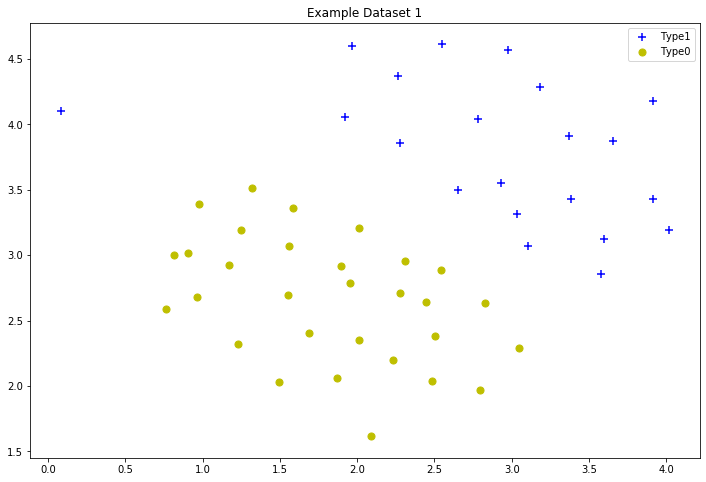

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x[positive][:,0], x[positive][:,1], s=50, c='b', marker='+', label='Type1')
ax.scatter(x[negative][:,0], x[negative][:,1], s=50, c='y', marker='o', label='Type0')
ax.legend()
ax.set_title('Example Dataset 1')
plt.show()

使用SVM学习类边界

In [16]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

C=1时的表现

In [17]:
svc.fit(x, y)
svc.score(x, y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

C设置为100

In [25]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(x, y)
svc2.score(x, y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

In [28]:
data = pd.DataFrame(x, columns=['x1','x2'])   # 用DataFrame存储
data['y'] = y

In [27]:
data.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


<function matplotlib.pyplot.show(*args, **kw)>

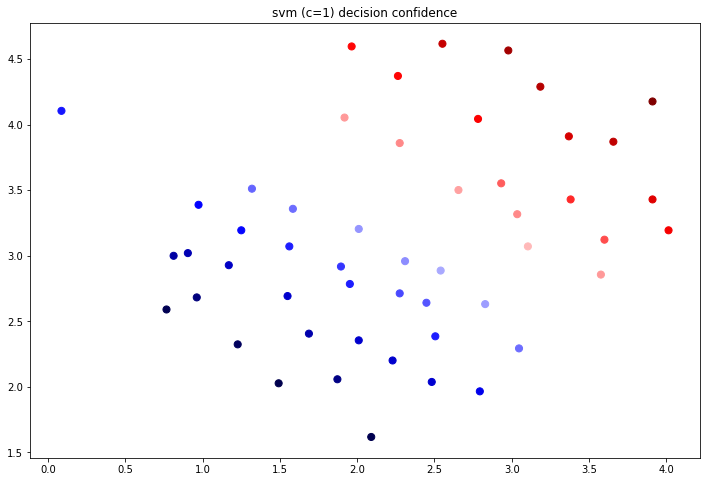

In [36]:
%matplotlib inline
data['svm 1 confidence'] = svc.decision_function(data[['x1','x2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['x1'], data['x2'], s=50, c=data['svm 1 confidence'], cmap='seismic')
ax.set_title('svm (c=1) decision confidence')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

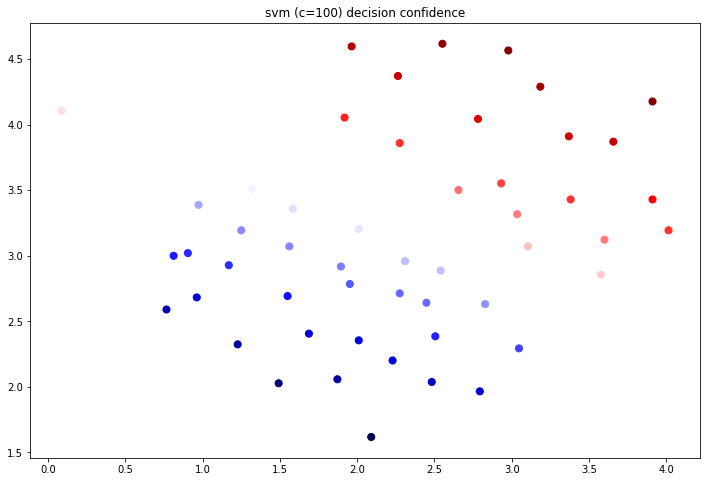

In [37]:
%matplotlib inline
data['svm 2 confidence'] = svc2.decision_function(data[['x1','x2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['x1'], data['x2'], s=50, c=data['svm 2 confidence'], cmap='seismic')
ax.set_title('svm (c=100) decision confidence')
plt.show

# SVM with Gaussian Kernel

实现高斯核函数

In [40]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2 / (2 * (sigma ** 2)))))

验证核函数是否正确

In [41]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

加载第二个数据集

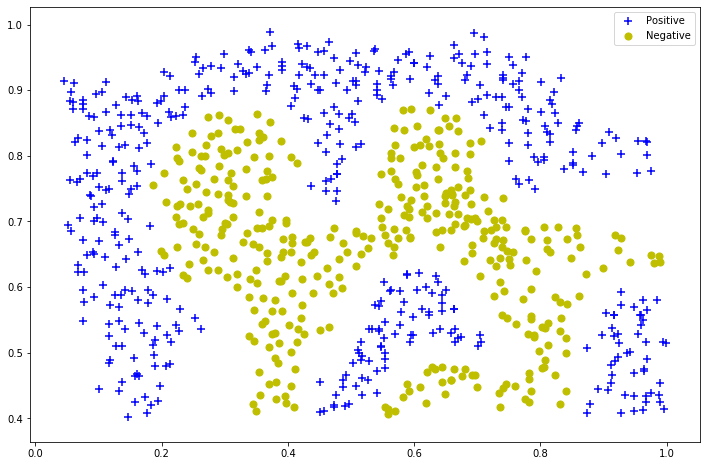

In [43]:
raw_data = loadmat('./data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1','X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='+', c='b', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', c='y', label='Negative')
ax.legend()
plt.show()

In [44]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

In [46]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]

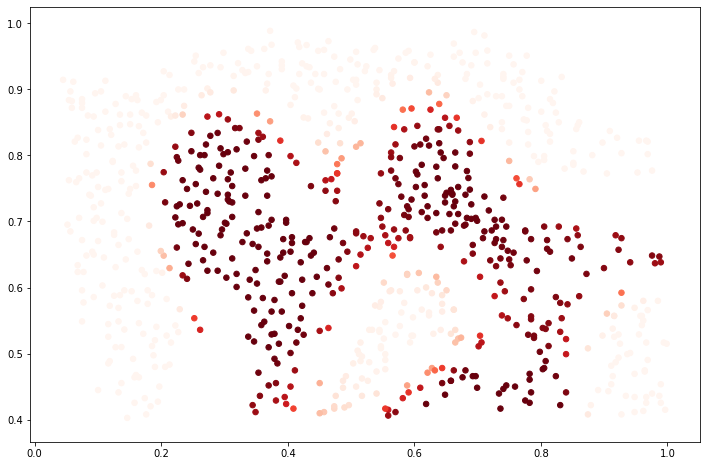

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')
plt.show()

使用第三个数据集，选择合适的参数C和$\sigma$

In [52]:
raw_data = loadmat('./data/ex6data3.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [66]:
x = raw_data['X']
xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()
# 初始化参数
C_candidate= [0.01,0.03,0.1,0.3,1,3,10,30,100]
sigma_candidate = [0.01,0.03,0.1,0.3,1,3,10,30,100]

best_score = 0
best_params = {'C':None, 'sigma':None}

for C in C_candidate:
    for sigma in sigma_candidate:
        svc = svm.SVC(C=C, gamma=sigma)
        svc.fit(x,y)
        score = svc.score(xval,yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['sigma'] = sigma
best_score, best_params

(0.965, {'C': 0.3, 'sigma': 100})

In [68]:
from sklearn import metrics
best_svc = svm.SVC(C=100, gamma=0.3)
best_svc.fit(x, y)
ypred = best_svc.predict(xval)

print(metrics.classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



# 使用SVM构建垃圾邮件过滤器

In [69]:
spam_train = loadmat('./data/spamTrain.mat')
spam_test = loadmat('./data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [75]:
x = spam_train['X']
y = spam_train['y'].ravel()
x_test = spam_test['Xtest']
y_test = spam_test['ytest'].ravel()
x.shape, y.shape, x_test.shape, y_test.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [74]:
svc = svm.SVC()
svc.fit(x, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(x, y) * 100, 2)))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training accuracy = 94.4%


In [78]:
print('Test accuracy = {0}%'.format(np.round(svc.score(x_test, y_test) * 100, 2)))

Test accuracy = 95.3%


In [79]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

以上使用了默认的参数

In [81]:
pred = svc.predict(x_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

    accuracy                           0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [82]:
# 使用逻辑回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
pred = model.predict(x_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



逻辑回归表现要好，尝试对svm的参数进行调整

In [84]:
svc = svm.SVC(C=3)
svc.fit(x, y)
pred = svc.predict(x_test)
print(metrics.classification_report(y_test, pred))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       692
           1       0.97      0.94      0.95       308

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



**表现稍微好了些，虽然sklearn中的各种机器学习算法都可以直接调用，但是目前对其中一些参数还是有些不理解，有时间看一看**  
